📁 Upload your advanced stats CSV file


Saving nba_advanced_stats_2024_2025.csv to nba_advanced_stats_2024_2025 (2).csv
🏀 Top 10 All-Around Impact Players (2024–25) – Multi-Metric Ranking


,Player,VORP,WS,PER,OBPM,DBPM,BPM,AllAroundScore
23,Nikola Jokic,9.8,16.4,32.0,9.9,3.3,13.3,0.996296
19,Shai Gilgeous-Alexander,8.9,16.7,30.7,8.9,2.6,11.5,0.908131
45,Giannis Antetokounmpo,6.6,11.5,30.5,6.9,2.5,9.5,0.736177
31,Tyrese Haliburton,4.9,10.4,21.8,5.7,0.2,5.8,0.454413
34,Domantas Sabonis,4.4,10.1,22.9,4.2,1.1,5.2,0.447058
170,Anthony Davis,2.9,6.2,27.1,4.5,1.5,6.0,0.446883
150,Luka Doncic,3.9,5.9,24.1,5.5,1.2,6.7,0.443416
169,Anthony Davis,3.2,6.7,26.3,3.9,1.5,5.4,0.431655
52,Stephen Curry,4.8,7.9,21.5,6.4,0.0,6.3,0.430378
13,Jayson Tatum,4.8,9.5,21.7,4.4,0.8,5.2,0.427860


/tmp/ipython-input-4-3218314099.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AllAroundScore', y='Player', data=df_top, palette='coolwarm')


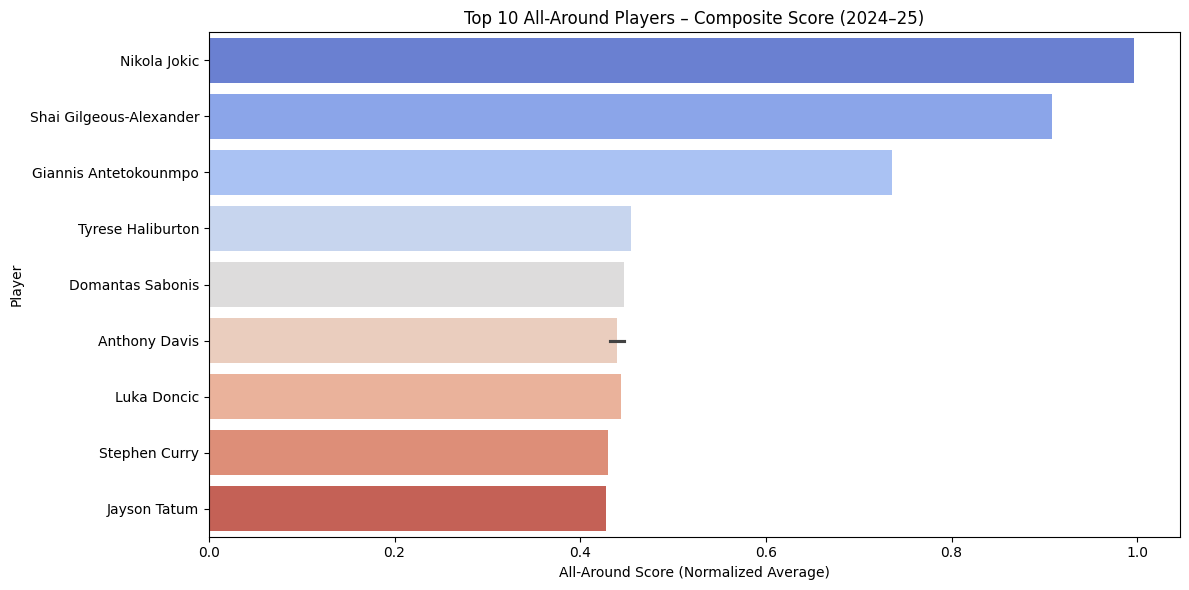

✅ Saved as top10_allaround_composite_2024_2025.csv


In [4]:
# 📓 Statline Quick Contribution Notebook
# 🎯 All-Around Impact Showcase – 2024–25 Season (Multi-Metric Ranking)

# 🟦 Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# 🟦 Step 2: Upload your file
print("📁 Upload your advanced stats CSV file")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# 🟦 Step 3: Load dataset
df = pd.read_csv(filename)

# 🟦 Step 4: Convert stats to numeric
cols = ['VORP', 'WS', 'PER', 'OBPM', 'DBPM', 'BPM']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

# 🟦 Step 5: Filter by strong all-around performance
df_filtered = df[
    (df['VORP'] > 1.0) &
    (df['WS'] > 3.0) &
    (df['PER'] > 18)
].copy()

# 🟦 Step 6: Normalize the performance metrics for fair ranking
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_filtered[['VORP_norm', 'WS_norm', 'PER_norm', 'OBPM_norm', 'DBPM_norm', 'BPM_norm']] = scaler.fit_transform(
    df_filtered[['VORP', 'WS', 'PER', 'OBPM', 'DBPM', 'BPM']]
)

# 🟦 Step 7: Compute average all-around score
df_filtered['AllAroundScore'] = df_filtered[
    ['VORP_norm', 'WS_norm', 'PER_norm', 'OBPM_norm', 'DBPM_norm', 'BPM_norm']
].mean(axis=1)

# 🟦 Step 8: Get top 10 players by overall score
df_top = df_filtered.sort_values(by='AllAroundScore', ascending=False).head(10)

# 🟦 Step 9: Show results
print("🏀 Top 10 All-Around Impact Players (2024–25) – Multi-Metric Ranking")

# Detect team column
team_col = next((col for col in ['Team', 'Tm', 'TEAM', 'team'] if col in df_top.columns), None)

# Display selected columns
display_cols = ['Player']
if team_col: display_cols.append(team_col)
display_cols += ['VORP', 'WS', 'PER', 'OBPM', 'DBPM', 'BPM', 'AllAroundScore']
display(df_top[display_cols])

# 🟦 Step 10: Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='AllAroundScore', y='Player', data=df_top, palette='coolwarm')
plt.title("Top 10 All-Around Players – Composite Score (2024–25)")
plt.xlabel("All-Around Score (Normalized Average)")
plt.ylabel("Player")
plt.tight_layout()
plt.show()

# 🟦 Step 11: Save output
df_top[display_cols].to_csv("top10_allaround_composite_2024_2025.csv", index=False)
print("✅ Saved as top10_allaround_composite_2024_2025.csv")